In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
mnist=tf.keras.datasets.mnist.load_data()

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist

In [ ]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

5


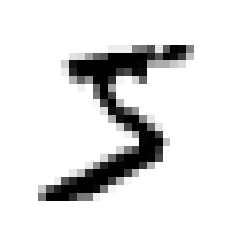

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
print(y_train[0])
plt.show()

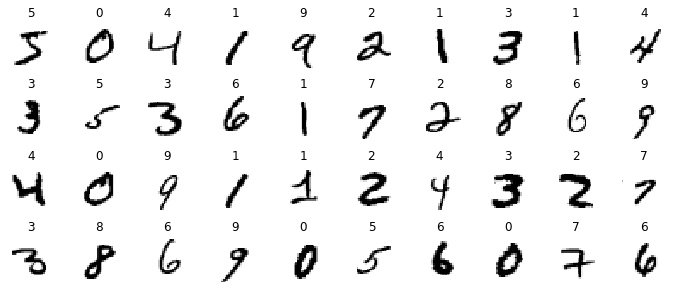

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
model=Sequential([
    Conv2D(32, (3, 3), input_shape = (28, 28,1), activation = 'relu', padding='valid'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, (3, 3),  activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(units = 100, activation = 'relu'),
    Dense(units = 10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

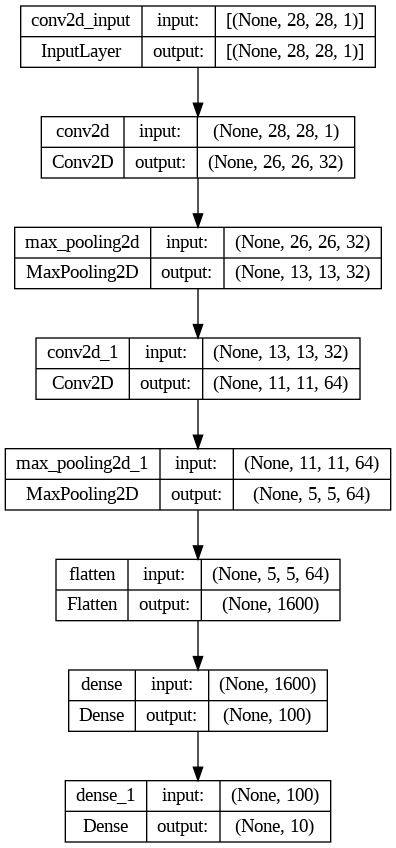

In [ ]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 56s 33ms/step - loss: 0.5459 - accuracy: 0.8420 - val_loss: 0.1592 - val_accuracy: 0.9522
Epoch 2/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.1475 - accuracy: 0.9555 - val_loss: 0.0880 - val_accuracy: 0.9756
Epoch 3/10
1719/1719 [==============================] - 57s 33ms/step - loss: 0.1033 - accuracy: 0.9687 - val_loss: 0.0873 - val_accuracy: 0.9748
Epoch 4/10
1719/1719 [==============================] - 55s 32ms/step - loss: 0.0824 - accuracy: 0.9744 - val_loss: 0.0764 - val_accuracy: 0.9778
Epoch 5/10
1719/1719 [==============================] - 56s 33ms/step - loss: 0.0705 - accuracy: 0.9783 - val_loss: 0.0696 - val_accuracy: 0.9798
Epoch 6/10
1719/1719 [==============================] - 57s 33ms/step - loss: 0.0616 - accuracy: 0.9808 - val_loss: 0.0741 - val_accuracy: 0.9790
Epoch 7/10
1719/1719 [==============================] - 57s 33ms/step - loss: 0.0552 - accuracy: 0.9829 - val_loss: 0.0558 -

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0528 - accuracy: 0.9828


[0.05275261402130127, 0.9828000068664551]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 110ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([7, 2, 1])

In [ ]:
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 7.jpg to 7.jpg
User uploaded file "7.jpg" with length 18087 bytes


In [ ]:
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img
import keras.utils as image

In [ ]:


test_image = load_img('7.jpg', target_size=(28,28))
# Convert the image to grayscale
test_image = test_image.convert('L')

# Display the grayscale image
test_image.show()

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)



In [ ]:
y_proba = model.predict(test_image)
y_proba.round(2)
y_pred = y_proba.argmax(axis=-1)

1/1 [==============================] - 0s 36ms/step


In [ ]:
y_pred

array([7])

In [ ]:
# result=[]
# for i in range(0,10):
#   i=0
#   filename=str(i)+'.jpg'
#   test_image = load_img(filename, target_size=(28,28))
#   # Convert the image to grayscale
#   test_image = test_image.convert('L')

#   # Display the grayscale image
#   test_image.show()

#   test_image = image.img_to_array(test_image)

#   test_image = np.expand_dims(test_image, axis=0)

#   y_proba = model.predict(test_image)
#   y_proba.round(2)
#   y_pred = y_proba.argmax(axis=-1)
#   result.append(y_pred)
